In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

np.random.seed(42)
tf.set_random_seed(42)

In [0]:
def loadNpData():
  x_ld = data['x']
  y_ld = data['y']  
  
  return x_ld, y_ld

def loadNpData():
  data = np.load('/content/drive/My Drive/ML_Data/fingerprint_Xception/fingerprint_data.npz')
  X_train_ld = data['xtrain']
  X_test_ld = data['xtest']  
  y_train_ld = data['ytrain']  
  y_test_ld = data['ytest']  
  
  return X_train_ld, X_test_ld, y_train_ld, y_test_ld

In [4]:
X_train, X_test, y_train, y_test = loadNpData()

print("X_train.shape::::::::::::::::::", X_train.shape)
print("X_test.shape:::::::::::::::::::", X_test.shape)
print("y_train.shape::::::::::::::::::", y_train.shape)
print("y_test.shape:::::::::::::::::::", y_test.shape)

X_train.shape:::::::::::::::::: (400, 28, 28)
X_test.shape::::::::::::::::::: (100, 28, 28)
y_train.shape:::::::::::::::::: (400, 1)
y_test.shape::::::::::::::::::: (100, 1)


In [5]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print("X_train.shape::::::::::::::::::", X_train.shape)
print("X_test.shape:::::::::::::::::::", X_test.shape)

X_train.shape:::::::::::::::::: (400, 28, 28, 1)
X_test.shape::::::::::::::::::: (100, 28, 28, 1)


### Convolution Structure

In [6]:
model_CNN = keras.models.Sequential()
model_CNN.add(keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = "same", 
                                 activation = "relu", input_shape = [28,28,1]))
model_CNN.add(keras.layers.MaxPooling2D(pool_size = 2))

model_CNN.add(keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = "same",activation = "relu"))
model_CNN.add(keras.layers.MaxPooling2D(pool_size = 2))

model_CNN.add(keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))

W0816 06:12:53.756546 140266618615680 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(units = 28, activation = 'relu'))
model_CNN.add(keras.layers.Dense(units = 14, activation = 'relu'))
model_CNN.add(keras.layers.Dense(units = 7, activation = 'relu'))
model_CNN.add(keras.layers.Dense(units = 1, activation = 'sigmoid')) #Since it is a binary classification
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 28)                8

In [8]:
model_CNN.compile(loss="binary_crossentropy",
              optimizer="adam", metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=5),
    keras.callbacks.ModelCheckpoint("/content/drive/My Drive/ML_Data/fingerprint_CNN/fingerprint_model.h5", save_best_only=True),
]
history_CNN = model_CNN.fit(X_train,  y_train, epochs=100,
                    validation_split = 0.1,
                    callbacks=callbacks)

W0816 06:12:54.021188 140266618615680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 360 samples, validate on 40 samples
Epoch 1/100
360/360 [==============================] - 1s 4ms/sample - loss: 2.8229 - acc: 0.5361 - val_loss: 1.8502 - val_acc: 0.5000
Epoch 2/100
360/360 [==============================] - 0s 503us/sample - loss: 0.7954 - acc: 0.5500 - val_loss: 0.6865 - val_acc: 0.5250
Epoch 3/100
360/360 [==============================] - 0s 477us/sample - loss: 0.6473 - acc: 0.6139 - val_loss: 0.6788 - val_acc: 0.5500
Epoch 4/100
360/360 [==============================] - 0s 472us/sample - loss: 0.4970 - acc: 0.8056 - val_loss: 0.4129 - val_acc: 0.7250
Epoch 5/100
360/360 [==============================] - 0s 465us/sample - loss: 0.4573 - acc: 0.7639 - val_loss: 0.3799 - val_acc: 0.8000
Epoch 6/100
360/360 [==============================] - 0s 461us/sample - loss: 0.3623 - acc: 0.8694 - val_loss: 0.1520 - val_acc: 0.9500
Epoch 7/100
360/360 [==============================] - 0s 285us/sample - loss: 0.2827 - acc: 0.8889 - val_loss: 0.2814 - val_acc: 0.875

In [9]:
bestModel = keras.models.load_model("/content/drive/My Drive/ML_Data/fingerprint_CNN/fingerprint_model.h5")

W0816 06:12:58.906234 140266618615680 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0816 06:12:58.912732 140266618615680 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
test_loss, test_accuracy = bestModel.evaluate(X_test, y_test)

print("Test loss{} and Test-accuracy {}".format(test_loss, test_accuracy))

100/100 [==============================] - 0s 621us/sample - loss: 0.0883 - acc: 0.9700
Test loss0.08828805774450302 and Test-accuracy 0.9700000286102295


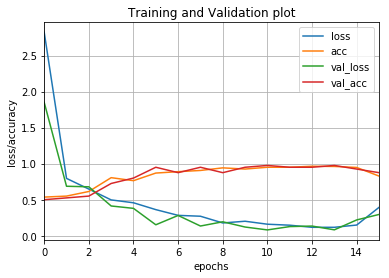

In [11]:
pd.DataFrame(history_CNN.history).plot()
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel("loss/accuracy")
plt.title("Training and Validation plot")
plt.show()